# Saud Hashmi

# Project work.

* Author: Saud Hashmi
* Created on: 26/03/2021

This Python Notebook deals with a CSV file that contains details of many Netflix
shows uptil the year 2017 and their ratings, release year, user rating score and how many users rated
them. We will use data analysis tools to find out:

1. Some basic statistical info about the shows.
2. Which show is the most highly rated?
3. Which show is the oldest and the latest?
4. Is there any way to know which shows are PG-Rated?

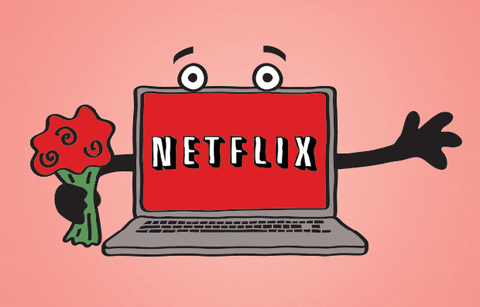

Before we begin, we will import the important modules

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pandasql as ps

First we'll import the CSV file

In [ ]:
shows = pd.read_csv('https://raw.githubusercontent.com/datacamp/community-groupby/master/data/chasewillden-netflix-shows/data/netflix.csv')

Let's see what kind of data we will be dealing with

In [ ]:
shows.dtypes

The attribute 'user_rating_score' contains many NaN values. Let's convert them into 0s.

In [ ]:
shows.user_rating_score = shows.user_rating_score.fillna(0)

Let's see how the dataframe looks now!

In [ ]:
shows.head()

# STATISTICAL INFORMATION ON THE DATASET

In [ ]:
shows.describe()

Let's see the rating types in a bar graph

In [ ]:
plt.figure(figsize=(12,10))
sns.set(style="darkgrid")
ax = sns.countplot(x="rating", data=shows, palette="Set2", order=shows['rating'].value_counts().index[0:15])

What about quantity of movies in all the years between 1940 and 2017.

In [ ]:
plt.figure(figsize=(15,20))
plt.hist(list(shows['release_year']), bins = [year for year in range(1940,2030,10)], color='red')
plt.show()

# Which show/shows is/are the most highly rated?

In [ ]:
max_score = shows.user_rating_score.max()
query = "SELECT title FROM shows WHERE user_rating_score = {}".format(max_score)
print(ps.sqldf(query, locals()))

We can see there are multiple re-entries in our dataset. Let's try to fix it.

In [ ]:

shows.title.drop_duplicates()
highest_rated_show_table = ps.sqldf(query, locals())
print("Highest Rated Show(s):")
print(set(highest_rated_show_table.title))

# Which show is the oldest and the latest?

In [ ]:
oldest_year, latest_year = shows.release_year.min(), shows.release_year.max()

query2 = "SELECT title FROM shows WHERE release_year = {}".format(oldest_year)
query3 = "SELECT title FROM shows WHERE release_year = {}".format(latest_year)

oldest_table = ps.sqldf(query2, locals())
latest_table = ps.sqldf(query3, locals())

print("Oldest Movies that were released in {}:".format(oldest_year))
print(set([title for title in oldest_table.title]))

print("\nLatest Movies that were released in {}:".format(latest_year))
print(set([title for title in latest_table.title]))

# Is there any way to know which shows are PG, PG-13 or R-Rated? Is there any way to visualize PG and non-PG shows?

In [ ]:
def isPG(show):
    return 'PG' or 'TV-PG' or 'PG-13' or 'R' in show

pg_shows = []
for show in shows.title:
    if isPG(show):
        pg_shows.append(show)

pg_shows = set(pg_shows)        
        
print("PG Shows:\n")
print(pg_shows)

In [ ]:
pg_count = len(pg_shows)
non_pg_count = shows.title.count() - pg_count

plt.pie([pg_count, non_pg_count], labels = [f'PG-Rated ({pg_count})', f'Non PG-Rated ({non_pg_count})'], shadow = True, radius = 2)
plt.show()